<a href="https://colab.research.google.com/github/applepple/apple/blob/main/Copy_of_n211a_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [2]:
# 필요한 페키지 호출
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# 데이터 타입 확인
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [5]:
# 데이터 결측치 확인
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# 상관관계 메트릭스 형성
corr = df.corr()
print(corr)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

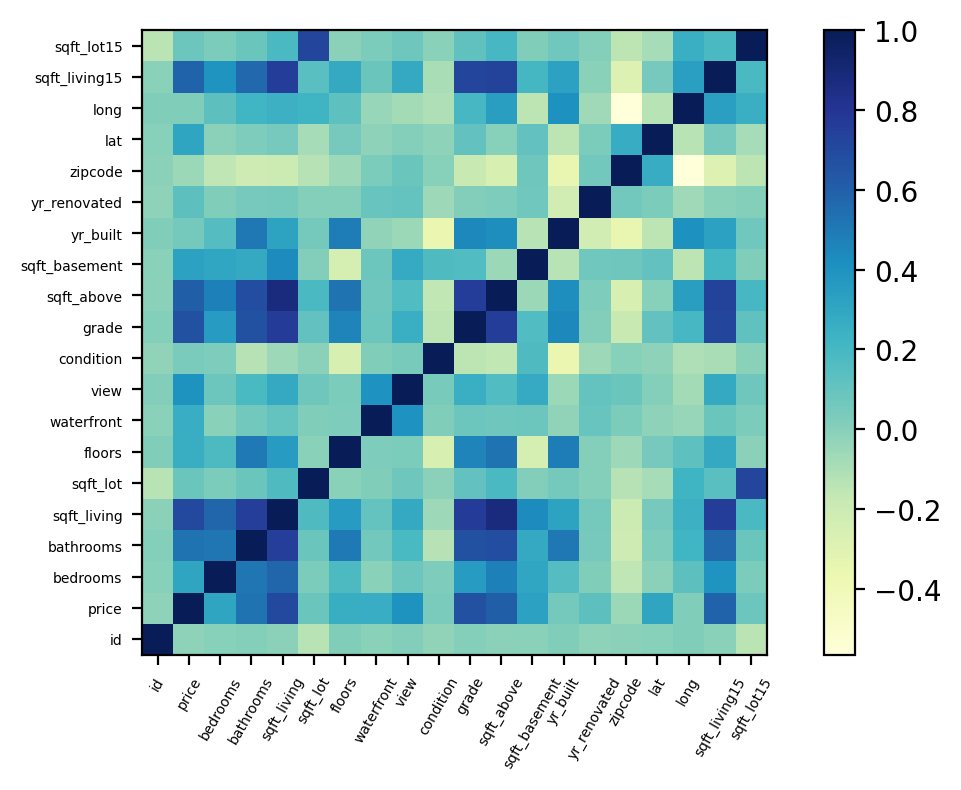

In [7]:
# 각 상관관계 시각화
plt.figure()
plt.gcf().set_dpi(200)
plt.imshow(corr, cmap = "YlGnBu", origin = "lower")
plt.xticks(range(len(corr)), corr.index, rotation = 60, fontsize = 5)
plt.yticks(range(len(corr)), corr.index, fontsize = 5)
plt.tight_layout()
plt.colorbar()
plt.show()

In [8]:
# 가격과 대응되는 해당하는 상관관계 확인
corr_price = corr["price"].sort_values(ascending = False)
corr_price

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

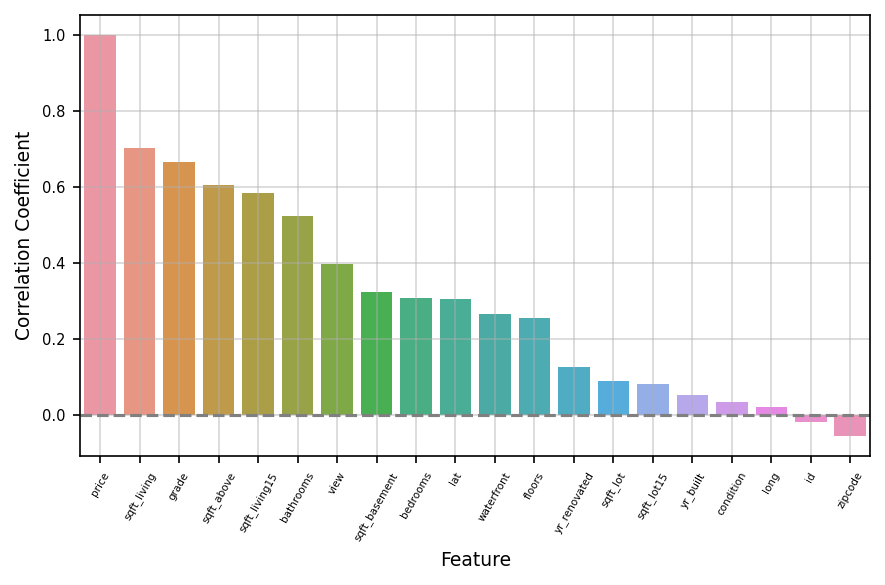

In [9]:
# 가격과 각 피쳐와의 상관관계 시각화
plt.figure()
plt.gcf().set_dpi(150)
sns.barplot(x = corr_price.index, y = corr_price.values)
plt.axhline(0, c = "grey", lw = 1.5, ls = "--")
plt.xticks(range(len(corr_price)), corr_price.index, rotation = 60, fontsize = 5)
plt.yticks(fontsize = 7)
plt.xlabel("Feature", size = 9)
plt.ylabel("Correlation Coefficient", size = 9)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

In [10]:
# 필요한 데이터만 추출
corr_temp = df.copy()
corr_temp = corr_temp[["sqft_living", "price", "bathrooms"]]

# 데이터의 통계적 추론을 위한 통계값 추론
des = corr_temp.describe()
des

,sqft_living,price,bathrooms
count,21613.000000,2.161300e+04,21613.000000
mean,2079.899736,5.400881e+05,2.114757
std,918.440897,3.671272e+05,0.770163
min,290.000000,7.500000e+04,0.000000
25%,1427.000000,3.219500e+05,1.750000
50%,1910.000000,4.500000e+05,2.250000
75%,2550.000000,6.450000e+05,2.500000
max,13540.000000,7.700000e+06,8.000000


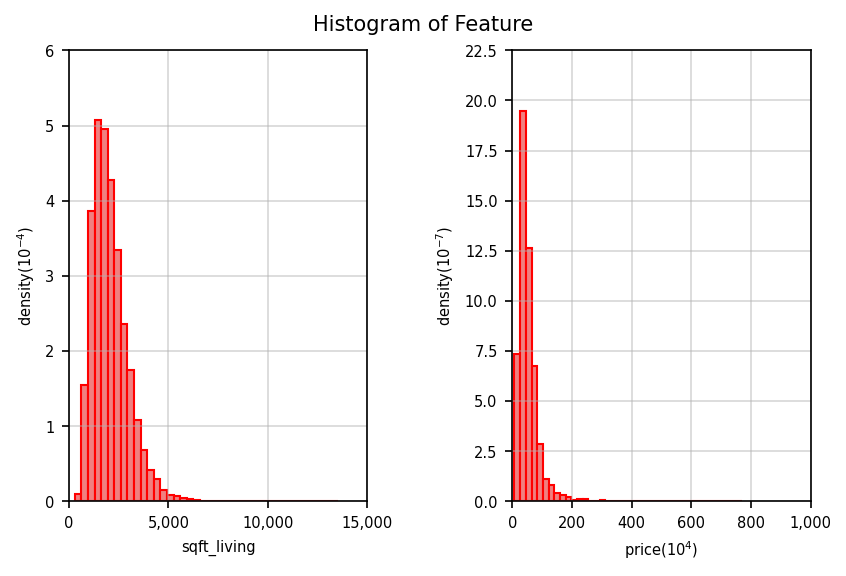

In [11]:
# 가격과 주거공간 데이터의 분포도 확인
fig, ax = plt.subplots(1,2)
fig.suptitle("Histogram of Feature", fontsize = 10)
fig.set_dpi(150)
ax[0].hist(corr_temp["sqft_living"], bins = 40, density = True, color = "lightcoral", edgecolor = "red")
ax[0].set_xlabel("sqft_living", size = 7)
ax[0].set_ylabel("density($10^{-4})$", size = 7)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(["{:,.0f}".format(i) for i in ax[0].get_xticks()], fontsize = 7)
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_yticklabels(["{:,.0f}".format(i*1e4) for i in ax[0].get_yticks()], fontsize = 7)
ax[0].set_xlim(0)
ax[0].grid(alpha = 0.5)

ax[1].hist(corr_temp["price"], bins = 40, density = True, color = "lightcoral", edgecolor = "red")
ax[1].set_xlabel("price($10^4$)", size = 7)
ax[1].set_ylabel("density($10^{-7})$", size = 7)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(["{:,.0f}".format(i/1e4) for i in ax[1].get_xticks()], fontsize = 7)
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels(["{:,.1f}".format(i*1e7) for i in ax[1].get_yticks()], fontsize = 7)
ax[1].set_xlim(0)
ax[1].grid(alpha = 0.5)
plt.tight_layout(pad = 2)
plt.show()

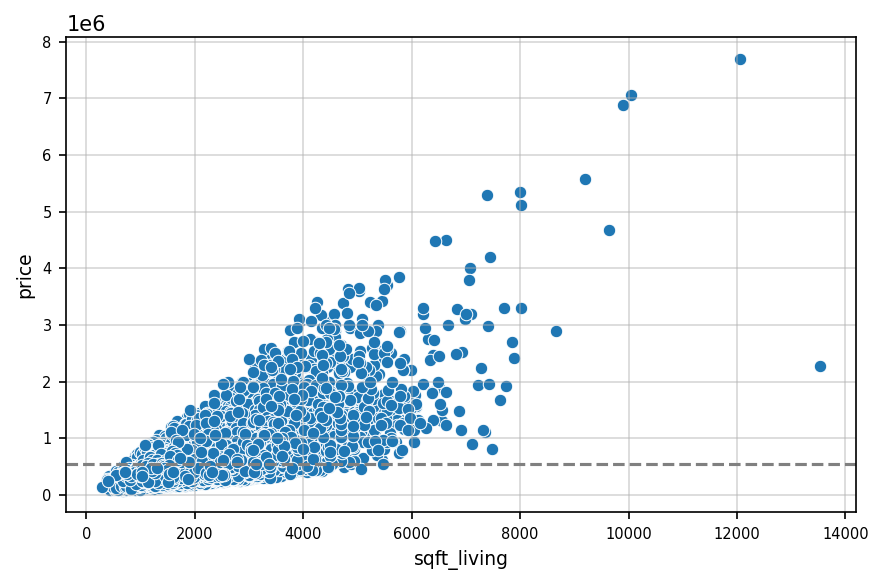

In [12]:
# price and sqft_living의 상관관계 시각화
plt.figure()
plt.gcf().set_dpi(150)
sns.scatterplot(x = "sqft_living", y = "price", data = corr_temp)
plt.axhline(des["price"][1], c = "grey", lw = 1.5, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("sqft_living", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

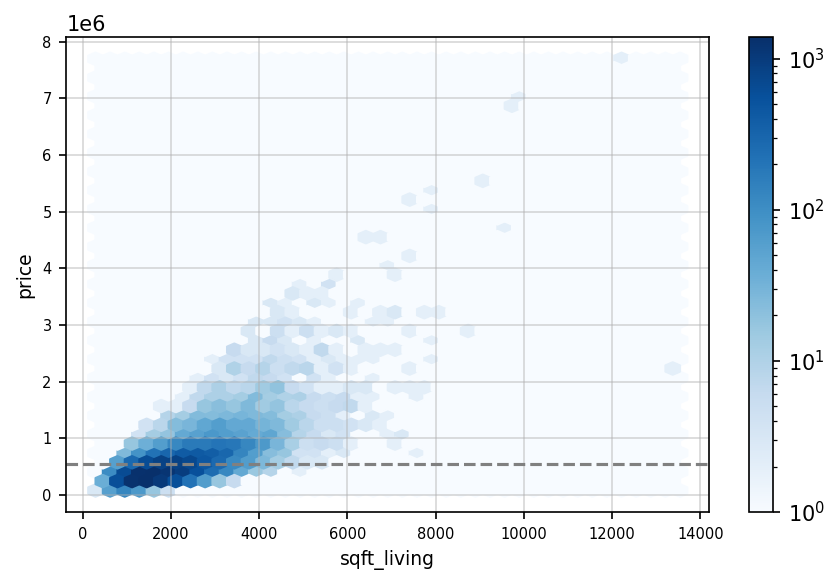

In [13]:
# 가격과 주거공간의 상관관계 시각화(육각형 구간)
plt.figure()
plt.gcf().set_dpi(150)
plt.hexbin(x = "sqft_living", y = "price", data = corr_temp, bins = "log", gridsize = 40, cmap = "Blues")
plt.axhline(des["price"][1], c = "grey", lw = 1.5, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("sqft_living", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.colorbar()
plt.tight_layout()
plt.show()

In [27]:
# 가격과 주거공간의 선형회귀 계수 확인
p_mean = des["price"][1]
error = corr_temp["price"] - p_mean
mean_abs_error = error.abs().mean()
print("예측한 주택 가격이 {:,.0f}이며 절대평균에러가 {:,.0f}임을 확인할 수 있습니다.".format(p_mean, mean_abs_error))
#print(f'예측한 주택 가격이 ${p_mean:,.0f}이며 절대평균에러가 ${mean_abs_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 540,088이며 절대평균에러가 233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [15]:
# 선형회귀를 위한 함수 호출
from sklearn.linear_model import LinearRegression

In [16]:
# 가격과 주거공간의 선형회귀
feature = ["sqft_living"]
target = ["price"]
X_train = corr_temp[feature]
y_train = corr_temp[target]
X_test = pd.DataFrame([15000], columns = feature)

lr = LinearRegression()
lr.fit(X_train, y_train)

# test data에 대한 예측
pred = lr.predict(X_test)
print("sqft_living이 15000일때, 가격의 예측값은 {:,.0f}입니다.".format(pred[0,0]))

sqft_living이 15000일때, 가격의 예측값은 4,165,773입니다.


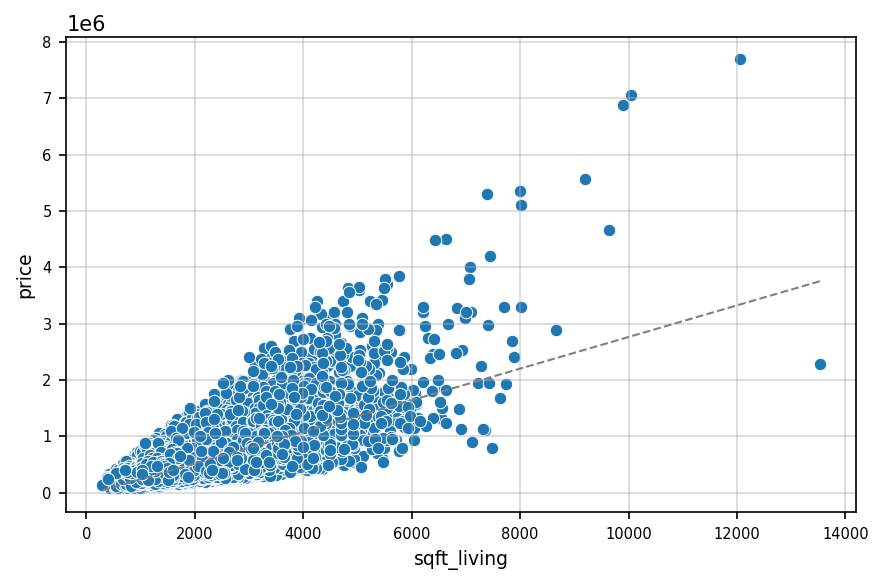

In [17]:
# 회귀함수의 독립변수, 종속변수
X = np.arange(min(corr_temp["sqft_living"]), max(corr_temp["sqft_living"])+1)
Y = lr.coef_[0][0]*X+lr.intercept_[0]

# 가격과 주거공간의 상관관계 시각화
plt.figure()
plt.gcf().set_dpi(150)
sns.scatterplot(x = "sqft_living", y = "price", data = corr_temp)
plt.plot(X, Y, c = "grey", lw = 1, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("sqft_living", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

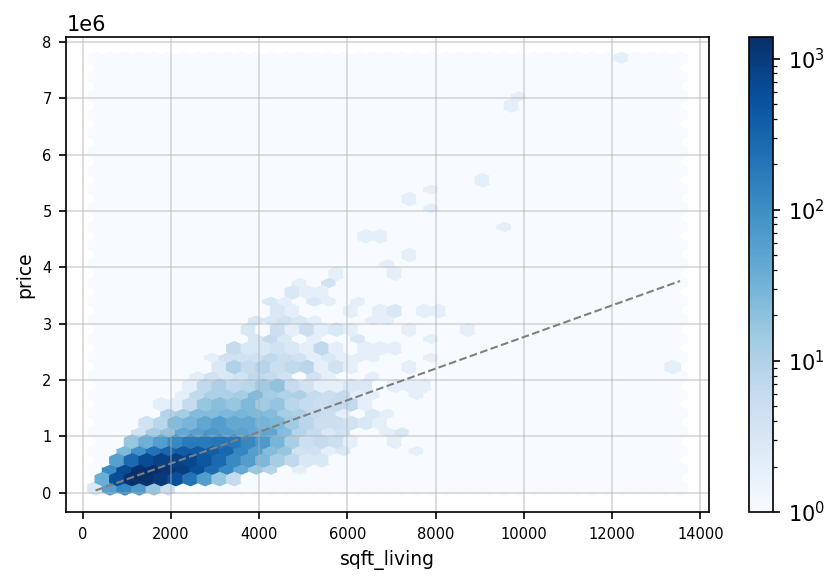

In [18]:
# 회귀함수의 독립변수, 종속변수
X = np.arange(min(corr_temp["sqft_living"]), max(corr_temp["sqft_living"])+1)
Y = lr.coef_[0][0]*X+lr.intercept_[0]

# 가격과 주거공간의 상관관계 시각화(육각형 구간)
plt.figure()
plt.gcf().set_dpi(150)
plt.hexbin(x = "sqft_living", y = "price", data = corr_temp, bins = "log", gridsize = 40, cmap = "Blues")
plt.plot(X, Y, c = "grey", lw = 1, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("sqft_living", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.colorbar()
plt.tight_layout()
plt.show()

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [19]:
# 회귀함수의 계수
print("sqft_living와 price의 선형회귀에서 각 계수는 다음과 같습니다.")
print("alpha = {:,.0f}".format(lr.coef_[0][0]))
print("beta = {:,.0f}".format(lr.intercept_[0]))

sqft_living와 price의 선형회귀에서 각 계수는 다음과 같습니다.
alpha = 281
beta = -43,581


### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

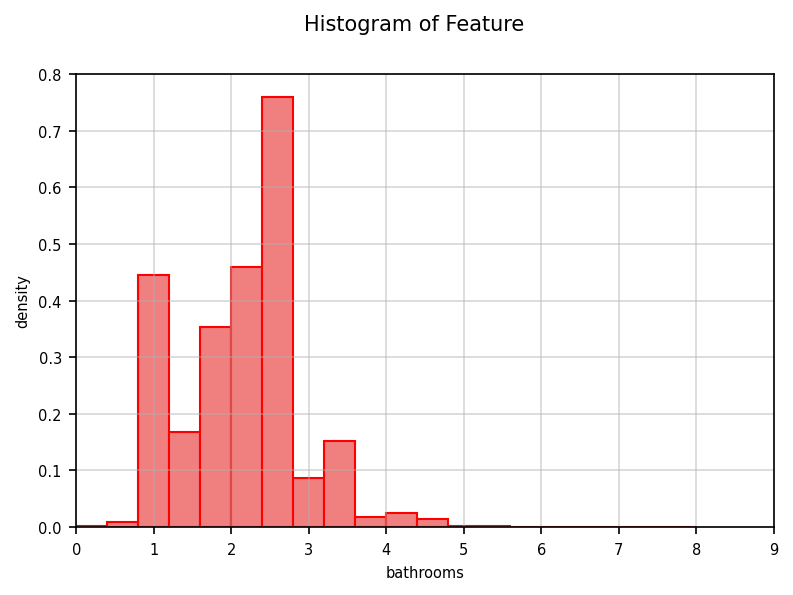

In [20]:
# 욕실의 데이터의 분포도 확인
fig, ax = plt.subplots(1,1)
fig.suptitle("Histogram of Feature", fontsize = 10)
fig.set_dpi(150)
ax.hist(corr_temp["bathrooms"], bins = 20, density = True, color = "lightcoral", edgecolor = "red")
ax.set_xlabel("bathrooms", size = 7)
ax.set_ylabel("density", size = 7)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["{:,.0f}".format(i) for i in ax.get_xticks()], fontsize = 7)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:,.1f}".format(i) for i in ax.get_yticks()], fontsize = 7)
ax.set_xlim(0)
ax.grid(alpha = 0.5)
plt.show()

In [21]:
# 가격과 욕실의 선형회귀
feature = ["bathrooms"]
target = ["price"]
X_train = corr_temp[feature]
y_train = corr_temp[target]

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

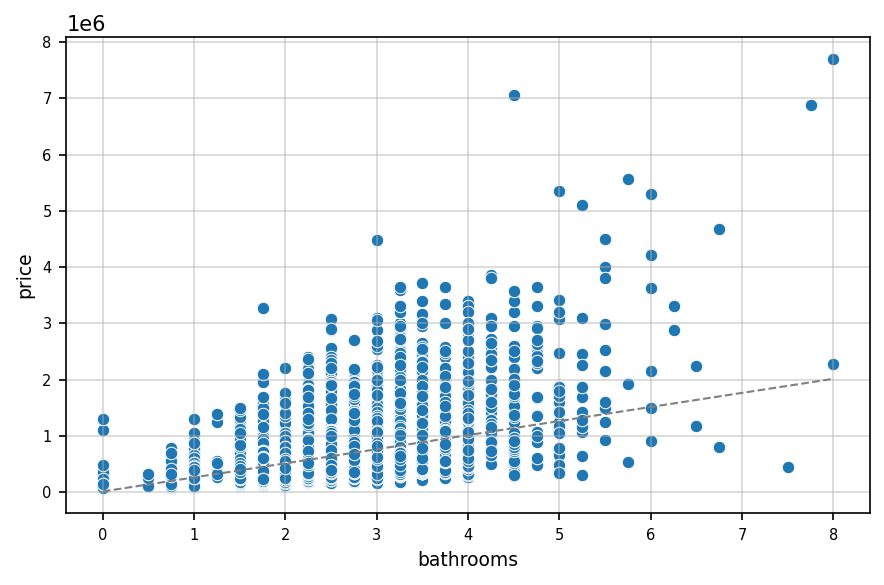

In [22]:
# 회귀함수의 독립변수, 종속변수
X = np.arange(min(corr_temp["bathrooms"]), max(corr_temp["bathrooms"])+1)
Y = lr2.coef_[0][0]*X+lr2.intercept_[0]

# 가격과 욕실 상관관계 시각화
plt.figure()
plt.gcf().set_dpi(150)
sns.scatterplot(x = "bathrooms", y = "price", data = corr_temp)
plt.plot(X, Y, c = "grey", lw = 1, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("bathrooms", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

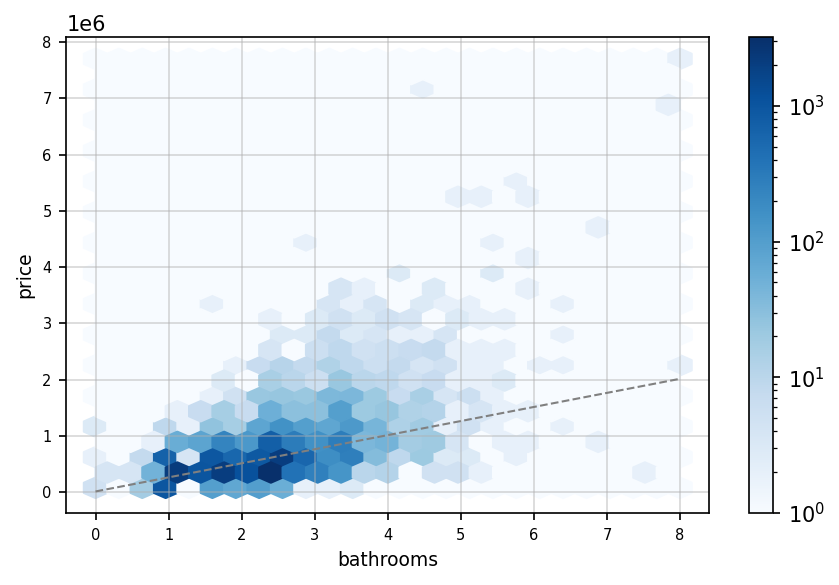

In [23]:
# 회귀함수의 독립변수, 종속변수
X = np.arange(min(corr_temp["bathrooms"]), max(corr_temp["bathrooms"])+1)
Y = lr2.coef_[0][0]*X+lr2.intercept_[0]

# 가격과 욕실의 상관관계 시각화(육각형 구간)
plt.figure()
plt.gcf().set_dpi(150)
plt.hexbin(x = "bathrooms", y = "price", data = corr_temp, bins = "log", gridsize = 25, cmap = "Blues")
plt.plot(X, Y, c = "grey", lw = 1, ls = "--")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel("bathrooms", size = 9)
plt.ylabel("price", size = 9)
plt.grid(alpha = 0.5)
plt.colorbar()
plt.tight_layout()
plt.show()

In [24]:
# 가격과 욕실의 선형회귀 계수 확인
print("bathrooms와 price의 선형회귀에서 각 계수는 다음과 같습니다.")
print("alpha = {:,.0f}".format(lr2.coef_[0][0]))
print("beta = {:,.0f}".format(lr2.intercept_[0]))

bathrooms와 price의 선형회귀에서 각 계수는 다음과 같습니다.
alpha = 250,327
beta = 10,708


## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.


6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.<br>

두 변수가 선형관계에 있어야 합니다.   
표본 추출이 무작위로 이뤄져야 합니다.   
직선을 그리기 위해 최소 2개 이상의 데이터가 있어야합니다.<br>
주어진 X값에서 오차의 평균은 0을 만족합니다.(Zero-conditional mean)<br>
주어진 X값에서 오차들은 정규분포를 이뤄야 합니다.(Normality ; 정규성)<br>
주어진 X값에서 오차들이 같은 정도로 퍼져 있어야 합니다.(homoscedasticity ; 등분산성)<br>
주어진 X값에서 오차항들끼리는 독립이어야 합니다.(Independence ; 독립성)<br><br>

7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해보세요.<br>

예측값과 관측값의 차이인 잔차를 최소화하기 위한 것으로 이 때 회귀선은 잔차제곱값들의 합(RSS)를 최소화하는 선입니다. 이 회귀선을 찾는 방법을 OLS(Ordinary Least Squares)라고 함.